In [17]:
import requests

def download_file_from_google_drive(id, destination):
    def get_confirm_token(response):
        for key, value in response.cookies.items():
            if key.startswith('download_warning'):
                return value
        return None

    def save_response_content(response, destination):
        CHUNK_SIZE = 32768

        with open(destination, "wb") as f:
            for chunk in response.iter_content(CHUNK_SIZE):
                if chunk:  # filter out keep-alive new chunks
                    f.write(chunk)

    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params={'id': id}, stream=True)
    token = get_confirm_token(response)

    if token:
        params = {'id': id, 'confirm': token}
        response = session.get(URL, params=params, stream=True)

    save_response_content(response, destination)

In [18]:
# Download Files
file_id = '10TNyD4Z08QT93R2rgIiqnrrGYCF8LId1'
destination = 'house_prices_reg.csv'
download_file_from_google_drive(file_id, destination)
print(f'File has been downloaded and saved as {destination}')

File has been downloaded and saved as house_prices_reg.csv


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

In [20]:
df = pd.read_csv('house_prices_reg.csv')
print(df.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [21]:
# Question 1:
# 1. Prepare the dataset: house_prices_reg.csv
#   You can use the same code that was made in the previous lab. Q5.
#   1. Load the file into a DataFrame 
#   2. Divide the data into features and target

#   3. Remove all the features that are not numerical
#   4. Remove features that are not relevant for the prediction

#   5. Make sure that there are no missing values in the data, if there are fill them with the mean value
#   6. Convert to PyTorch tensors

#   7. Create a DataLoader with batch size 32 of the data

#  2. Split the data into training and testing sets
#  3. Normalize the X values data
# You can use the reference code in the cell below the next question

In [22]:

X_train , X_test = train_test_split(df, test_size=0.2, random_state=42)

# remove all the none numerical columns 
X_train = X_train.select_dtypes(include=['int64', 'float64'])
# X_test = X_test.select_dtypes(include=['int64', 'float64'])
# print the columns that are not numerical print the difference between the columns of the train and test
print(set(df.columns) - set(X_train.columns))

# remove the id column
X_train = X_train.drop(columns=['Id'])
X_test = X_test.drop(columns=['Id'])


{'Exterior1st', 'Electrical', 'RoofStyle', 'BsmtCond', 'BsmtQual', 'KitchenQual', 'Condition1', 'Neighborhood', 'ExterCond', 'Heating', 'HeatingQC', 'LotShape', 'GarageFinish', 'SaleType', 'LotConfig', 'RoofMatl', 'Utilities', 'PavedDrive', 'MasVnrType', 'SaleCondition', 'PoolQC', 'HouseStyle', 'MSZoning', 'Alley', 'BldgType', 'GarageQual', 'Exterior2nd', 'Fence', 'LandContour', 'FireplaceQu', 'BsmtFinType1', 'LandSlope', 'Street', 'Condition2', 'ExterQual', 'BsmtExposure', 'GarageCond', 'MiscFeature', 'BsmtFinType2', 'GarageType', 'Functional', 'Foundation', 'CentralAir'}


In [23]:

X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

In [25]:
# convert to pytorch tensors
X_train_torch = torch.tensor(X_train.values).float()
# X_test_torch = torch.tensor(X_test.values).float()

In [26]:
# create a DataLoader with batch size 32
train_data = TensorDataset(X_train_torch)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

# split the tensor into training and testing sets with the y being the sale price 
X_train_torch_split, X_test_torch_split = train_test_split(X_train_torch, test_size=0.2, random_state=42)
# Normalize the X values data
scaler = StandardScaler()
X_train_torch_split = scaler.fit_transform(X_train_torch_split)
X_test_torch_split = scaler.transform(X_test_torch_split)


In [28]:
# Question 1 Text:
# 1. What was the columns that was removed?
'''
The column that was removed was the 'Id' column
and all the strings columns
'''
# 2. What other type of column transformations did you do
'''
We filled the missing values with the mean of the column
and normalized the data
'''

'\nWe filled the missing values with the mean of the column\nand normalized the data\n'

Epoch [100/1000], Loss: 2.5415
Epoch [200/1000], Loss: 1.0506
Epoch [300/1000], Loss: 2.3050
Epoch [400/1000], Loss: 1.4700
Epoch [500/1000], Loss: 1.1394
Epoch [600/1000], Loss: 0.9612
Epoch [700/1000], Loss: 0.8268
Epoch [800/1000], Loss: 0.8257
Epoch [900/1000], Loss: 0.6557
Epoch [1000/1000], Loss: 0.6137


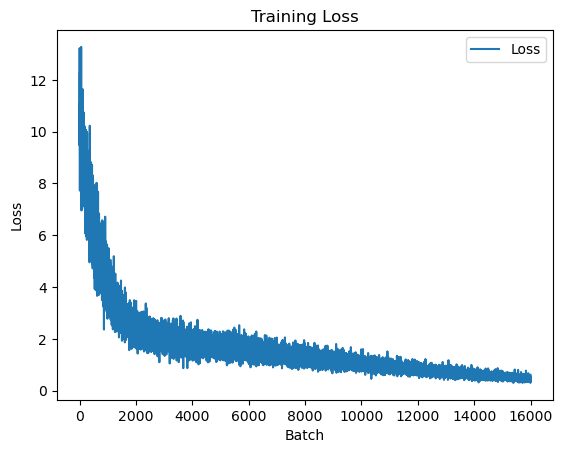

In [29]:
# Code Reference 
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset

# Define the neural network with a single hidden layer of size 16
class CustomNeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(CustomNeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_dim, 16)  # Single hidden layer with 16 neurons
        self.output_layer = nn.Linear(16, 1)  # Output layer with 1 neuron
        self.relu = nn.ReLU()  # ReLU activation function

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.output_layer(x)
        return x

# Seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Generate synthetic data
x1 = np.random.rand(1000)
x2 = np.random.rand(1000)
x3 = np.random.rand(1000)
noise = 0.01 * np.random.randn(1000)
y = 2 * x1 - 3 * x2 + 4 * x3 + 1 + noise

# Create DataFrame
data = {
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'y': y
}
df = pd.DataFrame(data)

# Convert DataFrame to PyTorch tensors
X = torch.tensor(df[['x1', 'x2', 'x3']].values, dtype=torch.float32)
y = torch.tensor(df['y'].values, dtype=torch.float32).view(-1, 1)

# Create TensorDataset and DataLoader
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Initialize the model, loss function, and optimizer
input_dim = X.shape[1]
model = CustomNeuralNetwork(input_dim)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 1000
all_epoch_loss = []
for epoch in range(num_epochs):
    for batch_X, batch_y in dataloader:
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        all_epoch_loss.append(loss.item())
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot the loss curve
import matplotlib.pyplot as plt

plt.plot(all_epoch_loss, label='Loss')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()


In [ ]:
# Question 2:
# 1. Use the dataloader that was created in the previous question to create 
# a fully connected neural network with the following architecture:
# - Input layer with the number of features of the dataset
# - 1 hidden layers with 16 neurons each
# - output layer with 1 neuron
# For the activation function use ReLU for the hidden layers and linear for the output layer
# 2. 
# Try to train the model, in two diffrenet configurations:
# A. Train the model on the original y_train, y_test values without any transformation
# B. Train the model on a StandardScaler
#  Train the model using the following configuration:
#  - Learning rate: 0.001
#  - Number of epochs: 10000
#  - Optimizer: SGD
#  - Loss function: MSE
# 3. Plot the loss curve
# You can use the code reference in the cell above to help you with the implementation


In [34]:
#  Create the model
input_dim = X_train_torch_split.shape[1]
model = CustomNeuralNetwork(input_dim)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
# Training loop
num_epochs = 100_000
all_epoch_loss = []
for epoch in range(num_epochs):
    for batch_X in train_loader:
        # Forward pass
        outputs = model(batch_X[0])
        loss = criterion(outputs, batch_X[0])
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        all_epoch_loss.append(loss.item())
    
    if (epoch + 1) % 10000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


# Plot the loss curve
plt.plot(all_epoch_loss, label='Loss')

Epoch [10000/100000], Loss: nan
Epoch [20000/100000], Loss: nan
Epoch [30000/100000], Loss: nan


KeyboardInterrupt: 

In [ ]:
# Question 2 Text:
# What was the difference in the loss curve between the two configurations?

In [ ]:
# Question 3:
# 1. Evaluate the model on the test set
# 2. What was the mean of the final 100 loss value on the training set?
# For the test set you can calculate the L1 loss by using this code ( df['errors'].abs().mean() )

In [80]:
# Answer 3:
y_test_pred = model(X_test)
test_loss = (y_test_pred - y_test_tensor).abs().mean()
print(f'Test Loss: {test_loss:.4f}')
# Final training loss value
final_training_loss = pd.DataFrame(all_epoch_loss).tail(100).abs().mean().iloc[0]
print(f'Final Training Loss: {final_train_loss:.4f}')


Test Loss: 0.3116
Final Training Loss: 0.0364


In [ ]:
# Question 3 Text:
# What was the difference between the test and train loss value?

Epoch [1000/50000], Train Loss: 0.2029, Test Loss: 0.1995
Epoch [2000/50000], Train Loss: 0.1556, Test Loss: 0.1685
Epoch [3000/50000], Train Loss: 0.1393, Test Loss: 0.1460
Epoch [4000/50000], Train Loss: 0.1331, Test Loss: 0.1340
Epoch [5000/50000], Train Loss: 0.1214, Test Loss: 0.1331
Epoch [6000/50000], Train Loss: 0.1143, Test Loss: 0.1314
Epoch [7000/50000], Train Loss: 0.1106, Test Loss: 0.1259
Epoch [8000/50000], Train Loss: 0.1101, Test Loss: 0.1250
Epoch [9000/50000], Train Loss: 0.1078, Test Loss: 0.1252
Epoch [10000/50000], Train Loss: 0.1089, Test Loss: 0.1257
Epoch [11000/50000], Train Loss: 0.1080, Test Loss: 0.1259
Epoch [12000/50000], Train Loss: 0.1079, Test Loss: 0.1255
Epoch [13000/50000], Train Loss: 0.1079, Test Loss: 0.1254
Epoch [14000/50000], Train Loss: 0.1080, Test Loss: 0.1252
Epoch [15000/50000], Train Loss: 0.1074, Test Loss: 0.1253
Epoch [16000/50000], Train Loss: 0.1066, Test Loss: 0.1252
Epoch [17000/50000], Train Loss: 0.1058, Test Loss: 0.1253
Epoch 

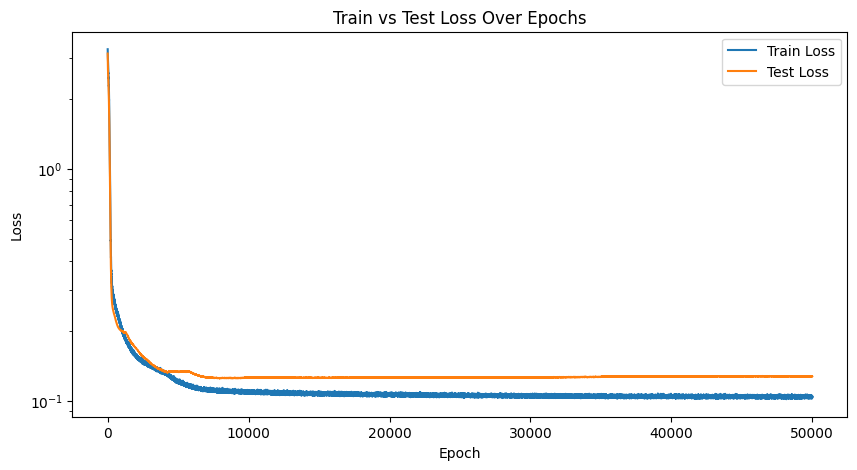

In [87]:
# Slides Code Reference
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Define the neural network with a single hidden layer of size 16
class CustomNeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(CustomNeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_dim, 4)  # Single hidden layer with 16 neurons
        self.output_layer = nn.Linear(4, 1)  # Output layer with 1 neuron
        self.relu = nn.ReLU()  # ReLU activation function

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.output_layer(x)
        return x

# Seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Generate synthetic data
x1 = np.random.rand(1000)
x2 = np.random.rand(1000)
x3 = np.random.rand(1000)
noise = 0.1 * np.random.randn(1000)
y = 2 * x1 - 3 * x2 + 4 * x3 -4*x3**2 -3 * x2**5 + 1 + noise

# Create DataFrame
data = {
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'y': y
}
df = pd.DataFrame(data)

# Convert DataFrame to PyTorch tensors
X = torch.tensor(df[['x1', 'x2', 'x3']].values, dtype=torch.float32)
y = torch.tensor(df['y'].values, dtype=torch.float32).view(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TensorDataset and DataLoader
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
input_dim = X.shape[1]
model = CustomNeuralNetwork(input_dim)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training loop
num_epochs = 50000
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0
    for batch_X, batch_y in train_loader:
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_train_loss += loss.item()
    
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    model.eval()
    epoch_test_loss = 0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            epoch_test_loss += loss.item()
    
    avg_test_loss = epoch_test_loss / len(test_loader)
    test_losses.append(avg_test_loss)
    
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}')

# Plot the loss curves
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Test Loss Over Epochs')
plt.show()


In [ ]:
# Question 4:
# Add the code to calculate the loss for calculating the loss for a batch of data in the training loop
# (Hint: You can use the same code that was used to calculate the loss for the test set)
# Plot the loss curve and compare the train and test loss values

In [ ]:
# Answer 4 Text:
# What is the difference between the train and test loss values?
# What can you infer from the loss curve?
# How to prevent overfitting in this case?

Epoch [100/1000], Train Loss: 0.2976, Test Loss: 0.0979
Epoch [200/1000], Train Loss: 0.2408, Test Loss: 0.0684
Epoch [300/1000], Train Loss: 0.2426, Test Loss: 0.0594
Epoch [400/1000], Train Loss: 0.2303, Test Loss: 0.0479
Epoch [500/1000], Train Loss: 0.2034, Test Loss: 0.0449
Epoch [600/1000], Train Loss: 0.1892, Test Loss: 0.0387
Epoch [700/1000], Train Loss: 0.1929, Test Loss: 0.0333
Epoch [800/1000], Train Loss: 0.1604, Test Loss: 0.0303
Epoch [900/1000], Train Loss: 0.1482, Test Loss: 0.0302
Epoch [1000/1000], Train Loss: 0.1641, Test Loss: 0.0278


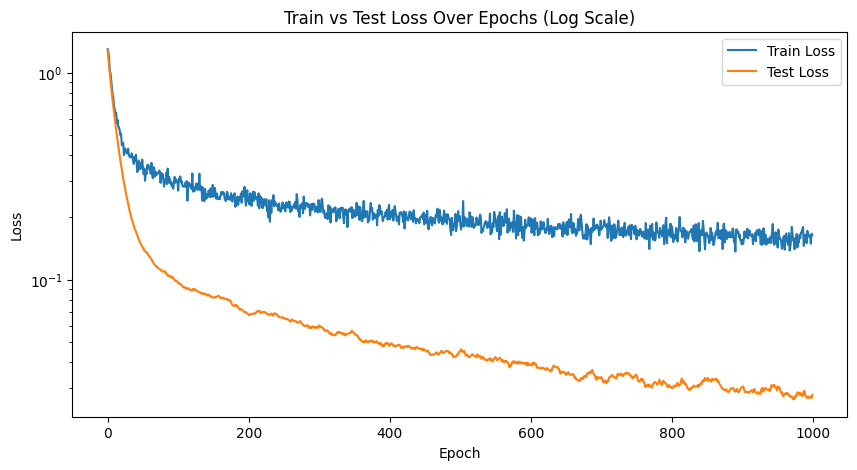

In [89]:
# Presentation Code Reference
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Define the neural network with a single hidden layer of size 16 and dropout
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 16)  # Single hidden layer with 16 neurons
        self.dropout = nn.Dropout(0.5)  # Dropout layer with 50% dropout rate
        self.output_layer = nn.Linear(16, 1)  # Output layer with 1 neuron
        self.relu = nn.ReLU()  # ReLU activation function

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.dropout(x)  # Apply dropout during training
        x = self.output_layer(x)
        return x

# Seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Generate synthetic data
x1 = np.random.rand(1000)
x2 = np.random.rand(1000)
x3 = np.random.rand(1000)
noise = 0.01 * np.random.randn(1000)
y = 2 * x1 - 3 * x2 + 4 * x3 + 1 + noise

# Create DataFrame
data = {
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'y': y
}
df = pd.DataFrame(data)

# Convert DataFrame to PyTorch tensors
X = torch.tensor(df[['x1', 'x2', 'x3']].values, dtype=torch.float32)
y = torch.tensor(df['y'].values, dtype=torch.float32).view(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler_X = StandardScaler()
X_train = torch.tensor(scaler_X.fit_transform(X_train), dtype=torch.float32)
X_test = torch.tensor(scaler_X.transform(X_test), dtype=torch.float32)

scaler_y = StandardScaler()
y_train = torch.tensor(scaler_y.fit_transform(y_train).astype(float), dtype=torch.float32)
y_test = torch.tensor(scaler_y.transform(y_test).astype(float), dtype=torch.float32)

# Create DataLoader with batch size 32
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
model = SimpleNN(input_dim)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training loop
num_epochs = 1000
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    
    epoch_train_loss = 0
    for batch_X, batch_y in train_loader:
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_train_loss += loss.item()
    
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    model.eval()
    epoch_test_loss = 0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            epoch_test_loss += loss.item()
    
    avg_test_loss = epoch_test_loss / len(test_loader)
    test_losses.append(avg_test_loss)
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}')

# Plot the loss curves with log scale
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.title('Train vs Test Loss Over Epochs (Log Scale)')
plt.show()


Epoch [100/1000], Train Loss: 0.0096, Test Loss: 0.0089
Epoch [200/1000], Train Loss: 0.0078, Test Loss: 0.0083
Epoch [300/1000], Train Loss: 0.0073, Test Loss: 0.0078
Epoch [400/1000], Train Loss: 0.0077, Test Loss: 0.0074
Epoch [500/1000], Train Loss: 0.0072, Test Loss: 0.0069
Epoch [600/1000], Train Loss: 0.0062, Test Loss: 0.0065
Epoch [700/1000], Train Loss: 0.0070, Test Loss: 0.0062
Epoch [800/1000], Train Loss: 0.0055, Test Loss: 0.0059
Epoch [900/1000], Train Loss: 0.0051, Test Loss: 0.0056
Epoch [1000/1000], Train Loss: 0.0055, Test Loss: 0.0053


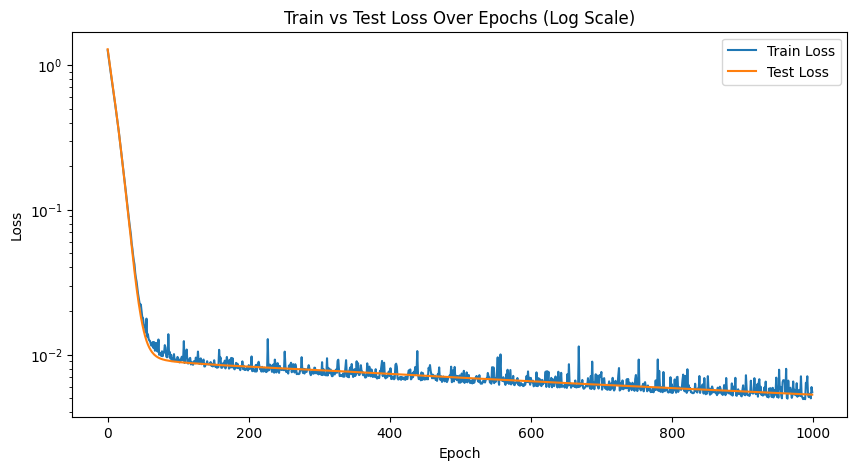

In [92]:
# Presentation Code Reference
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Define the neural network with a single hidden layer of size 16 and dropout
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 16)  # Single hidden layer with 16 neurons
        self.dropout = nn.Dropout(0.001)  # Dropout layer with 50% dropout rate
        self.output_layer = nn.Linear(16, 1)  # Output layer with 1 neuron
        self.relu = nn.ReLU()  # ReLU activation function

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.dropout(x)  # Apply dropout during training
        x = self.output_layer(x)
        return x

# Seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Generate synthetic data
x1 = np.random.rand(1000)
x2 = np.random.rand(1000)
x3 = np.random.rand(1000)
noise = 0.01 * np.random.randn(1000)
y = 2 * x1 - 3 * x2 + 4 * x3 + 1 + noise

# Create DataFrame
data = {
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'y': y
}
df = pd.DataFrame(data)

# Convert DataFrame to PyTorch tensors
X = torch.tensor(df[['x1', 'x2', 'x3']].values, dtype=torch.float32)
y = torch.tensor(df['y'].values, dtype=torch.float32).view(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler_X = StandardScaler()
X_train = torch.tensor(scaler_X.fit_transform(X_train), dtype=torch.float32)
X_test = torch.tensor(scaler_X.transform(X_test), dtype=torch.float32)

scaler_y = StandardScaler()
y_train = torch.tensor(scaler_y.fit_transform(y_train).astype(float), dtype=torch.float32)
y_test = torch.tensor(scaler_y.transform(y_test).astype(float), dtype=torch.float32)

# Create DataLoader with batch size 32
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
model = SimpleNN(input_dim)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training loop
num_epochs = 1000
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    
    epoch_train_loss = 0
    for batch_X, batch_y in train_loader:
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_train_loss += loss.item()
    
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    model.eval()
    epoch_test_loss = 0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            epoch_test_loss += loss.item()
    
    avg_test_loss = epoch_test_loss / len(test_loader)
    test_losses.append(avg_test_loss)
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}')

# Plot the loss curves with log scale
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.title('Train vs Test Loss Over Epochs (Log Scale)')
plt.show()


In [ ]:
import torch.nn as nn

# Initialize the loss function
criterion = nn.CrossEntropyLoss()

# Example of predicted outputs (logits) from a neural network
outputs = torch.tensor([[1.5, 2.0, 0.5], [1.2, 0.8, 1.0]], requires_grad=True)
# Example of actual class labels
labels = torch.tensor([1, 2])

# Compute the loss
loss = criterion(outputs, labels)
print(loss)


Epoch [1/10], Train Loss: 0.2739, Test Loss: 0.1341, Accuracy: 95.84%
Epoch [2/10], Train Loss: 0.1328, Test Loss: 0.0962, Accuracy: 97.06%
Epoch [3/10], Train Loss: 0.0975, Test Loss: 0.0798, Accuracy: 97.66%
Epoch [4/10], Train Loss: 0.0821, Test Loss: 0.0729, Accuracy: 97.81%
Epoch [5/10], Train Loss: 0.0695, Test Loss: 0.0986, Accuracy: 96.95%
Epoch [6/10], Train Loss: 0.0653, Test Loss: 0.0779, Accuracy: 97.82%
Epoch [7/10], Train Loss: 0.0578, Test Loss: 0.0644, Accuracy: 98.11%
Epoch [8/10], Train Loss: 0.0527, Test Loss: 0.0818, Accuracy: 97.92%
Epoch [9/10], Train Loss: 0.0521, Test Loss: 0.0751, Accuracy: 97.95%
Epoch [10/10], Train Loss: 0.0460, Test Loss: 0.0770, Accuracy: 98.06%


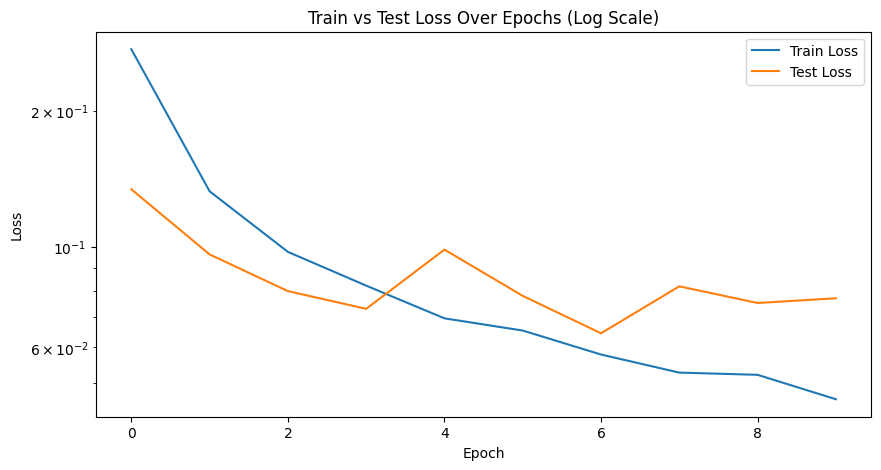

In [93]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the neural network
class MNISTNN(nn.Module):
    def __init__(self):
        super(MNISTNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)  # Output layer, no activation here because CrossEntropyLoss includes softmax
        return x

# Load the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
model = MNISTNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    model.eval()
    epoch_test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            epoch_test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += batch_y.size(0)
            correct += (predicted == batch_y).sum().item()
    
    avg_test_loss = epoch_test_loss / len(test_loader)
    test_losses.append(avg_test_loss)
    accuracy = 100 * correct / total
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}, Accuracy: {accuracy:.2f}%')

# Plot the loss curves
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.title('Train vs Test Loss Over Epochs (Log Scale)')
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the CNN
class MNISTCNN(nn.Module):
    def __init__(self):
        super(MNISTCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(128 * 3 * 3, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.dropout(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.dropout(x)
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        x = self.dropout(x)
        x = x.view(-1, 128 * 3 * 3)  # Flatten the input for the fully connected layer
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)  # Output layer, no activation here because CrossEntropyLoss includes softmax
        return x


In [ ]:
# Question 5:
# 1. Use the provided CNN to train the MNIST dataset
# 2. Train the model for 20 epochs
# 3. Use the Adam optimizer with a learning rate of 0.001
# 4. Plot the loss curve
